In [3]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Expand dimensions to add a channel dimension
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

# Convert labels to categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model = Sequential()

# Block 1
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

# Block 2
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

# Flatten the output
model.add(Flatten())

# Fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))  # 10 classes for MNIST

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history =model.fit(train_images, train_labels, batch_size=64, epochs=100, validation_data=(test_images, test_labels))

Epoch 1/100
938/938 [==============================] - 7s 6ms/step - loss: 0.1221 - accuracy: 0.9621 - val_loss: 0.0368 - val_accuracy: 0.9887
Epoch 2/100
938/938 [==============================] - 6s 6ms/step - loss: 0.0352 - accuracy: 0.9899 - val_loss: 0.0259 - val_accuracy: 0.9918
Epoch 3/100
938/938 [==============================] - 5s 5ms/step - loss: 0.0237 - accuracy: 0.9925 - val_loss: 0.0195 - val_accuracy: 0.9932
Epoch 4/100
938/938 [==============================] - 5s 5ms/step - loss: 0.0179 - accuracy: 0.9941 - val_loss: 0.0317 - val_accuracy: 0.9891
Epoch 5/100
938/938 [==============================] - 6s 6ms/step - loss: 0.0127 - accuracy: 0.9963 - val_loss: 0.0291 - val_accuracy: 0.9907
Epoch 6/100
938/938 [==============================] - 5s 6ms/step - loss: 0.0111 - accuracy: 0.9964 - val_loss: 0.0374 - val_accuracy: 0.9896
Epoch 7/100
938/938 [==============================] - 6s 6ms/step - loss: 0.0091 - accuracy: 0.9972 - val_loss: 0.0395 - val_accuracy: 0.9898

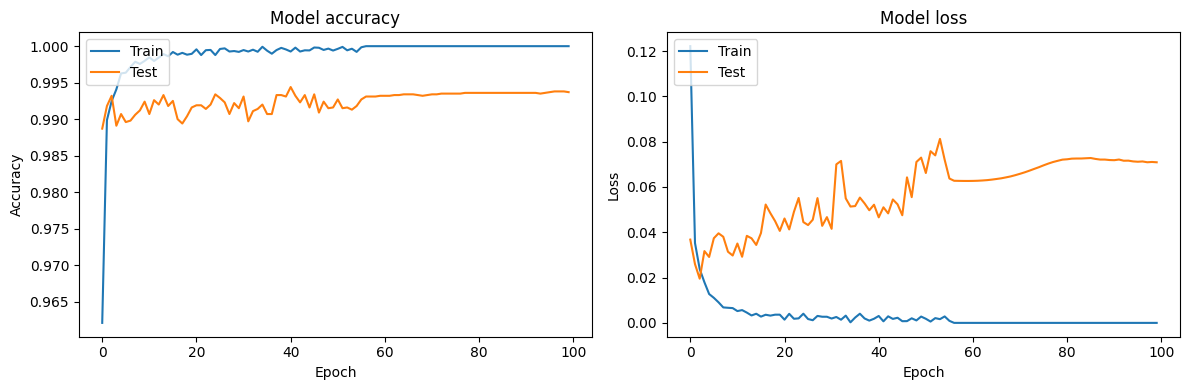

In [4]:
# Plot training history
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

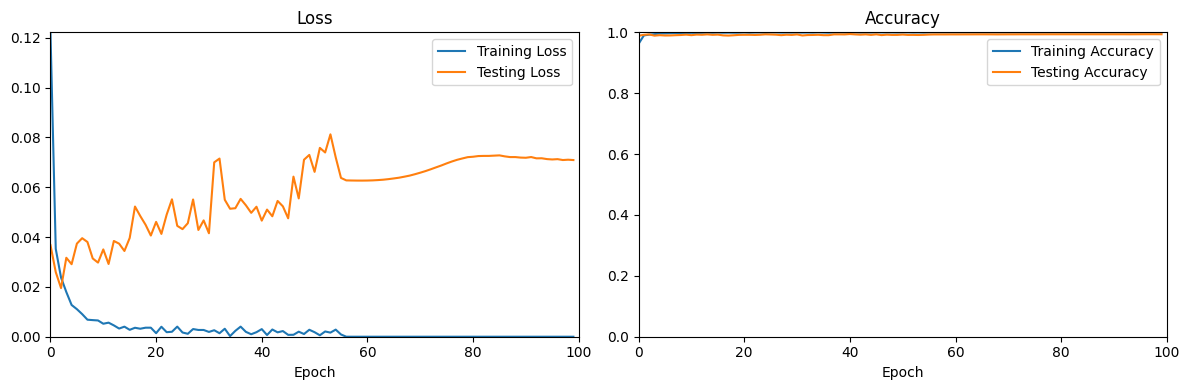

In [7]:
plt.figure(figsize=(12, 4))

# Plot Training & Validation Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylim(0, max(max(history.history['loss']), max(history.history['val_loss'])))
plt.xlim(0, len(history.history['loss']))  # Set xlim to start from zero
plt.legend()

# Plot Training & Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Testing Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylim(0, 1)
plt.xlim(0, len(history.history['accuracy']))  # Set xlim to start from zero
plt.legend()

plt.tight_layout()
plt.show()

313/313 [==============================] - 1s 3ms/step


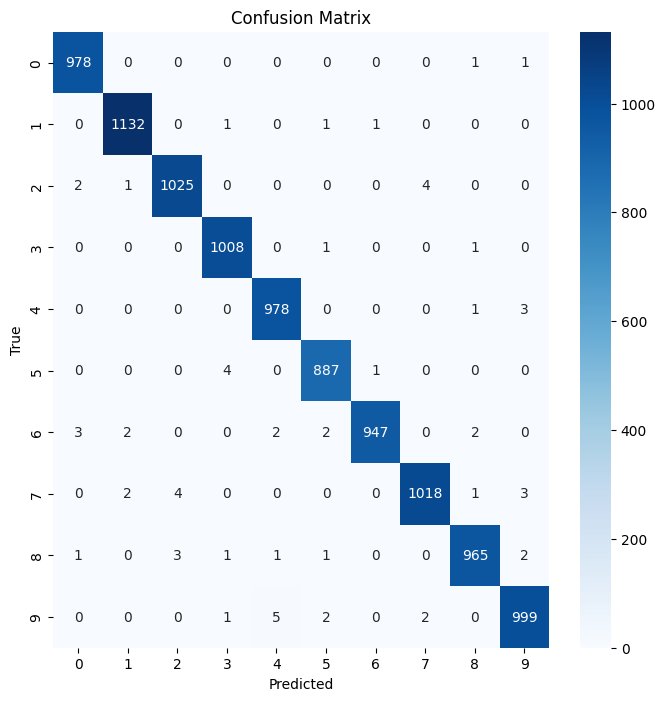

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      1.00      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Get predictions
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Get class names
class_names = [str(i) for i in range(10)]  # Assuming you have 10 classes for MNIST

# Plot confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Print classification report
print("Classification Report:\n", classification_report(true_labels, predicted_labels, target_names=class_names))
